In [23]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta,time
import os
from scipy.signal import butter, lfilter, welch, periodogram, find_peaks
from scipy.fft import fft, fftfreq, ifft, fftshift, rfft, irfft, ifftshift
import math as M
import json
import pickle
import pandas as pd
import pickle
import matplotlib.dates as mdates
import soundfile as sf
from scipy import signal
import multiprocessing

In [24]:
def axvlines(ax = None, xs = [0, 1], ymin=0, ymax=1, **kwargs):
    ax = ax or plt.gca()
    for x in xs:
        ax.axvline(x, ymin=ymin, ymax=ymax, **kwargs)
        
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
        ax = fig.add_subplot(111)
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        
# the data more uniform (just average among the peaks)
def butter_bandpass(lowcut, highcut, Fs, order):
    nyq = 0.5 * Fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, Fs, order):
    b, a = butter_bandpass(lowcut, highcut, Fs, order=order)
    y = lfilter(b, a, data)
    return y  

def _nearest_pow_2(x):

    a = M.pow(2, M.ceil(np.log2(x)))
    b = M.pow(2, M.floor(np.log2(x)))
    if abs(a - x) < abs(b - x):
        return a
    else:
        return b   

In [25]:
path = './data/'
phone_name="PaulB"
#%cd \"./data/RC0067 Nov 2022/\"
all_files = os.listdir(path)

In [26]:
all_files = [i for i in all_files if i.endswith('.wav') and i.startswith('230122_2717')]
#start = datetime.fromisoformat('2021-11-03T00:06:00')
#start = datetime.fromisoformat('2023-01-23T00:03:00')
#start = datetime.fromisoformat('2023-01-24T00:03:00')
start = datetime.fromisoformat('2023-01-22T22:27:00')
len(all_files)

1

In [27]:
delta = timedelta(minutes=1)
t = np.array([start + (i-1)*delta for i in range(len(all_files))])
#sunrise = time(hour=7,minute=55,second=0)
#sunset = time(17,50,0)

In [28]:
file_name = np.sort(all_files)[0]
i = sorted(all_files).index(file_name) 
#i = all_files.index("211103_0220.wav") # Example for the Paper
t_begin = t[i]
print(file_name)
print(t_begin)


230122_2717.wav
2023-01-22 22:26:00


In [29]:
a = np.array([[1,2,3], [4,5,6]])

b = np.reshape(a, (3,-1))
b = np.reshape(a, 6)
print(b)
print(np.reshape(b, (-1,2)[0]))

print(b[0:9])
print(b[2:])

# print(int(s2*fs))
# print(signal_filt[0:int(s2*fs)])

[1 2 3 4 5 6]
[1 2 3 4 5 6]
[1 2 3 4 5 6]
[3 4 5 6]


In [30]:
lowcut = 500
highcut = 20000
#file_name = all_files[i]
signal_raw, fs = sf.read(path+file_name)
signal_raw = np.reshape(signal_raw, (-1, 2)[0])
signal_raw[np.isnan(fs)] = 0
# FILTER
signal_filt = butter_bandpass_filter(signal_raw, lowcut, highcut, fs, order=3)
t_vector = np.linspace(0,signal_raw.shape[0]/fs,signal_raw.shape[0])


# Detection algorithm
# signal_filt2 = butter_bandpass_filter(signal_raw, lowcut, highcut, fs, order=3)
# temp = np.abs(signal_filt2).cumsum()
# sta = np.zeros(len(signal_filt2))
# lta = np.zeros(len(signal_filt2))
# sta_ind = int(44100*2/1000)
# lta_ind = int(44100*100/1000) 
# sta[0:sta_ind] = temp[0:sta_ind]
# sta[sta_ind:] = (temp[sta_ind:]-temp[:-sta_ind]) / sta_ind
# lta[0:lta_ind] = temp[0:lta_ind]
# lta[lta_ind:] = (temp[lta_ind:] - temp[:-lta_ind]) / lta_ind
# ratio = sta/lta
# ratio_norm = ratio/np.max(ratio)
# ratio_norm = ratio_norm - np.mean(ratio_norm)

In [31]:
# s1 = 0
# s2 = 5*60+1 # the time we care about
# nperseg = int(fs/100)
# noverlap = int(0.5*nperseg)
# nfft = nperseg
# f_sxx, t_sxx, Sxx = signal.spectrogram(signal_filt[int(s1*fs):int(s2*fs)], fs, nfft=nfft , window = 'hann',nperseg = nperseg,noverlap = noverlap,scaling='density')

# vmin = 80
# vmax = 150
# fig, ax = plt.subplots(figsize=(14,10))
# plt.pcolormesh(t_sxx, f_sxx, 10*np.log10(Sxx)+199.4, shading='nearest',vmin = vmin,vmax = vmax)
# plt.ylim(0,20000)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [s]')
# plt.colorbar(ticks=np.arange(vmin,vmax,10),label = 'dB')

# # ax2 = ax.twinx()
# # ax2.plot(t_vector[0:int(s2*fs)-int(s1*fs)], ratio_norm[int(s1*fs):int(s2*fs)],'k',linewidth=1) #the black area at the middle**
# # plt.ylim(-0.5,0.2)
# # plt.yticks(np.arange(-0.4, 0.202, step=0.25))

# plt.rcParams.update({'font.size': 38})
# plt.axis(xmin = 80,xmax = 100)
# # plt.savefig('bubble_spect_detection.tiff',bbox_inches = 'tight')

In [32]:
# s1 = 123.85
# s2 = 123.875
# fig, ax = plt.subplots(figsize=(16,10))
# plt.plot(t_vector[int(s1*fs):int(s2*fs)],signal_filt[int(s1*fs):int(s2*fs)])

2023_01_22_22_27_00_PaulB.PNG


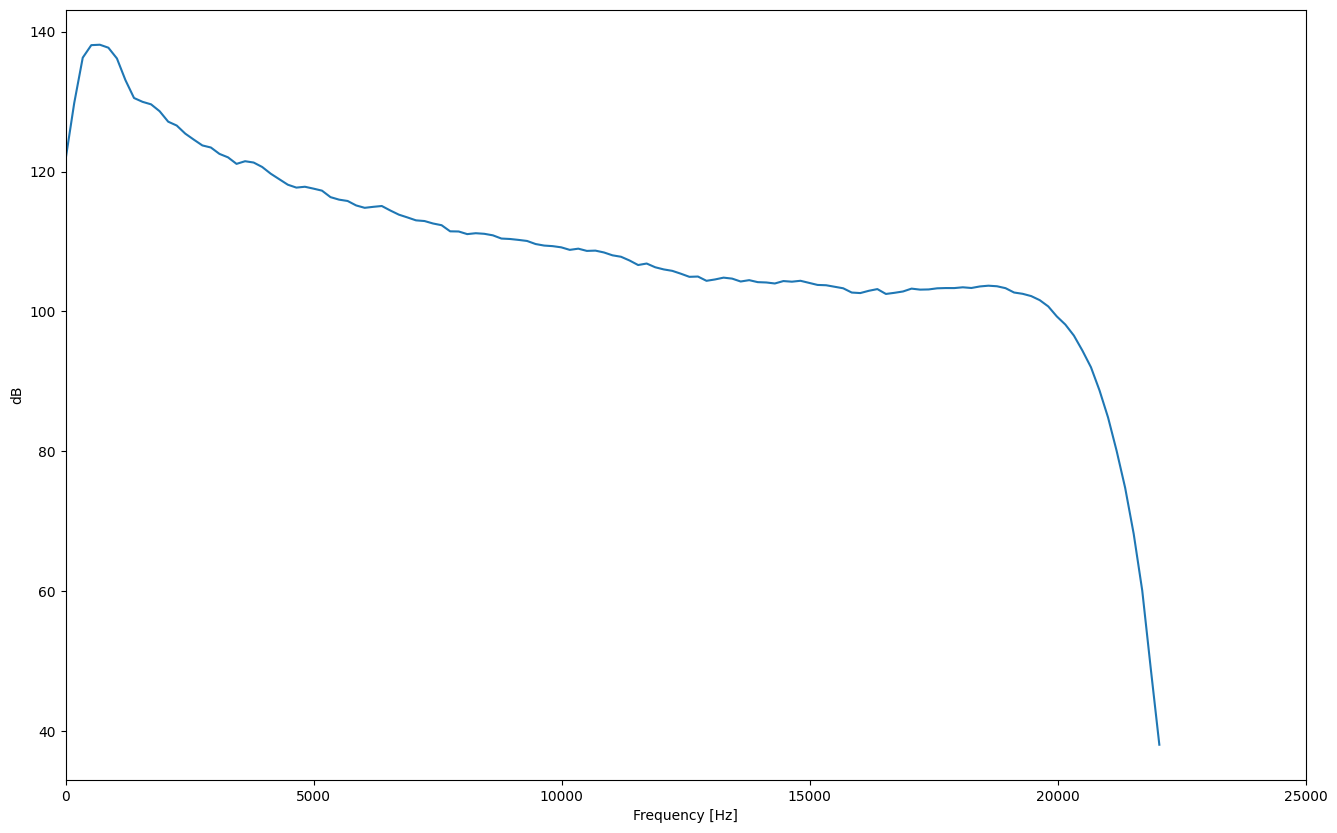

2023_01_22_22_28_00_PaulB.PNG


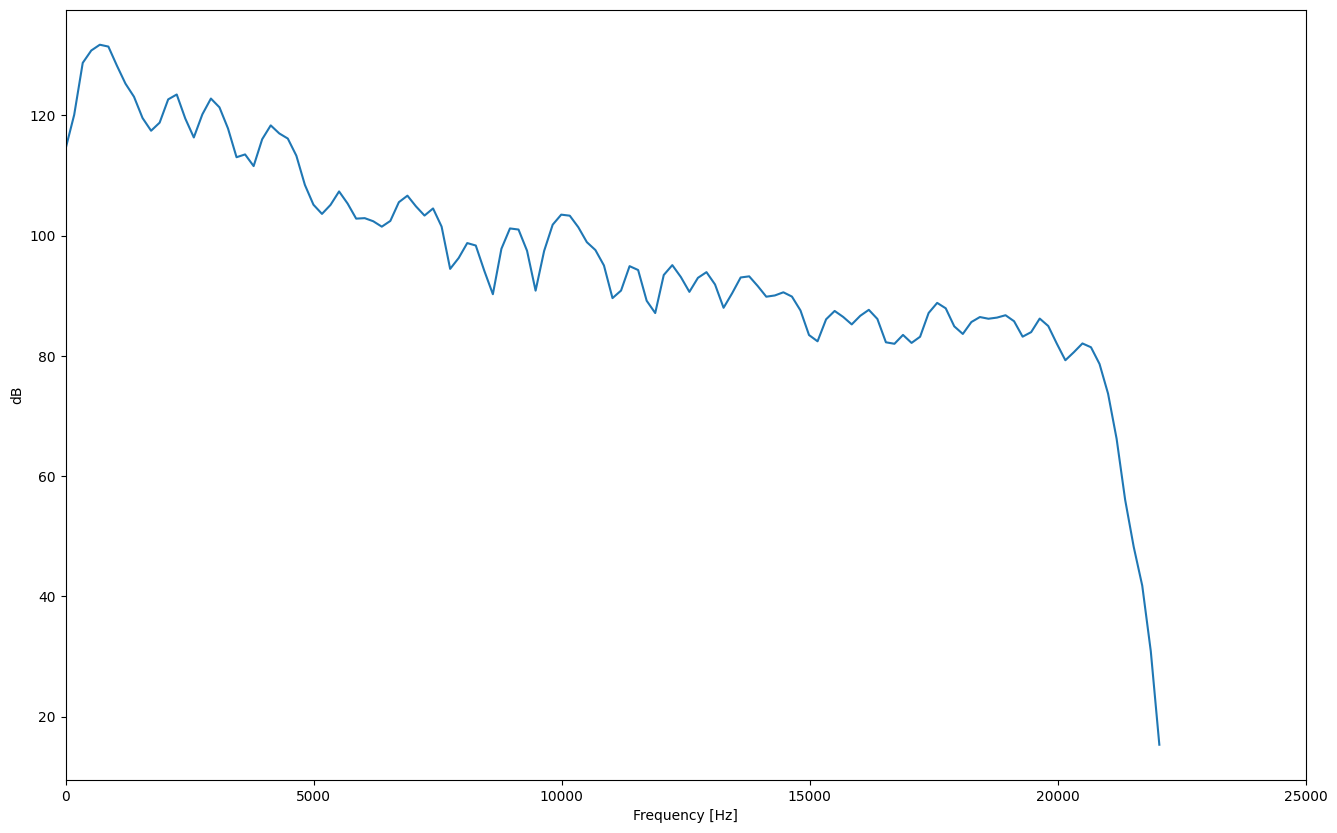

2023_01_22_22_29_00_PaulB.PNG


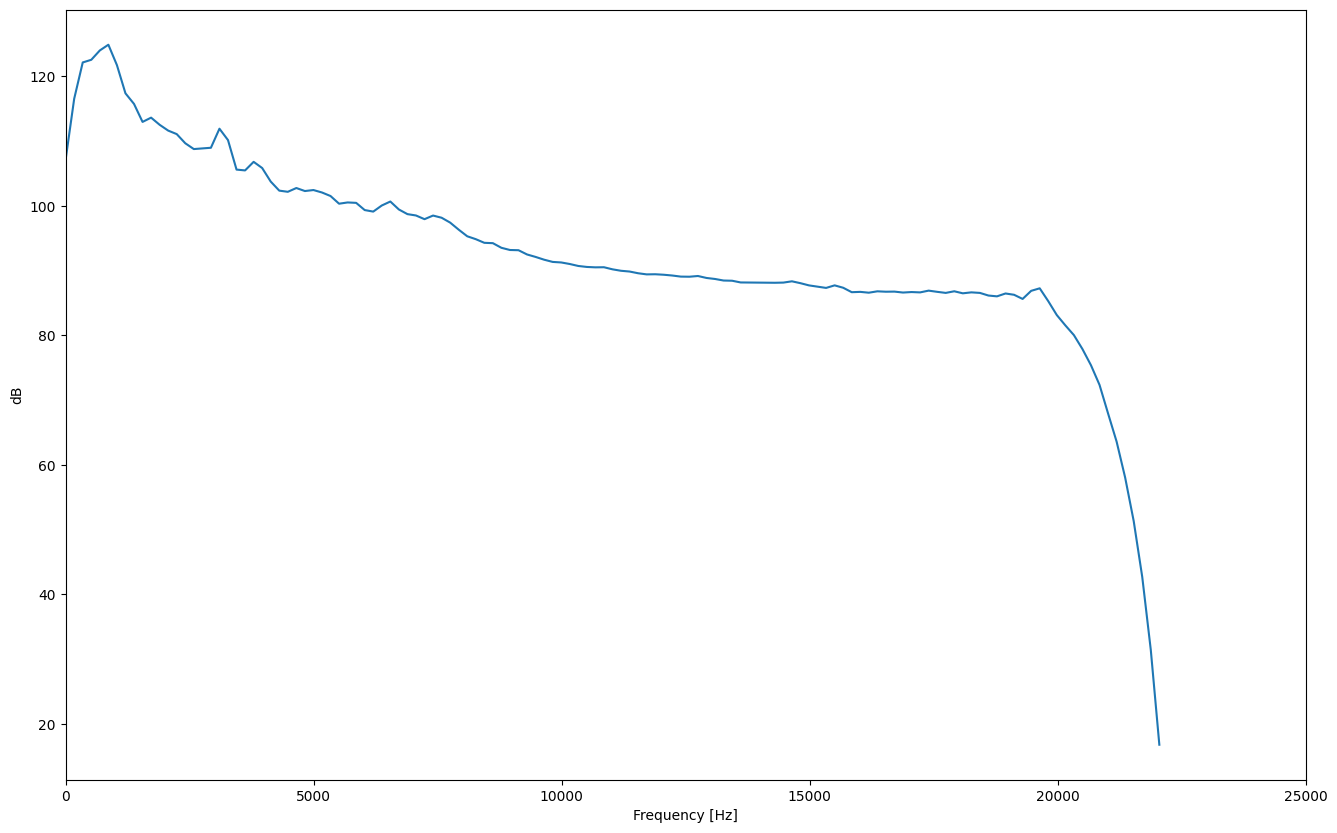

2023_01_22_22_30_00_PaulB.PNG


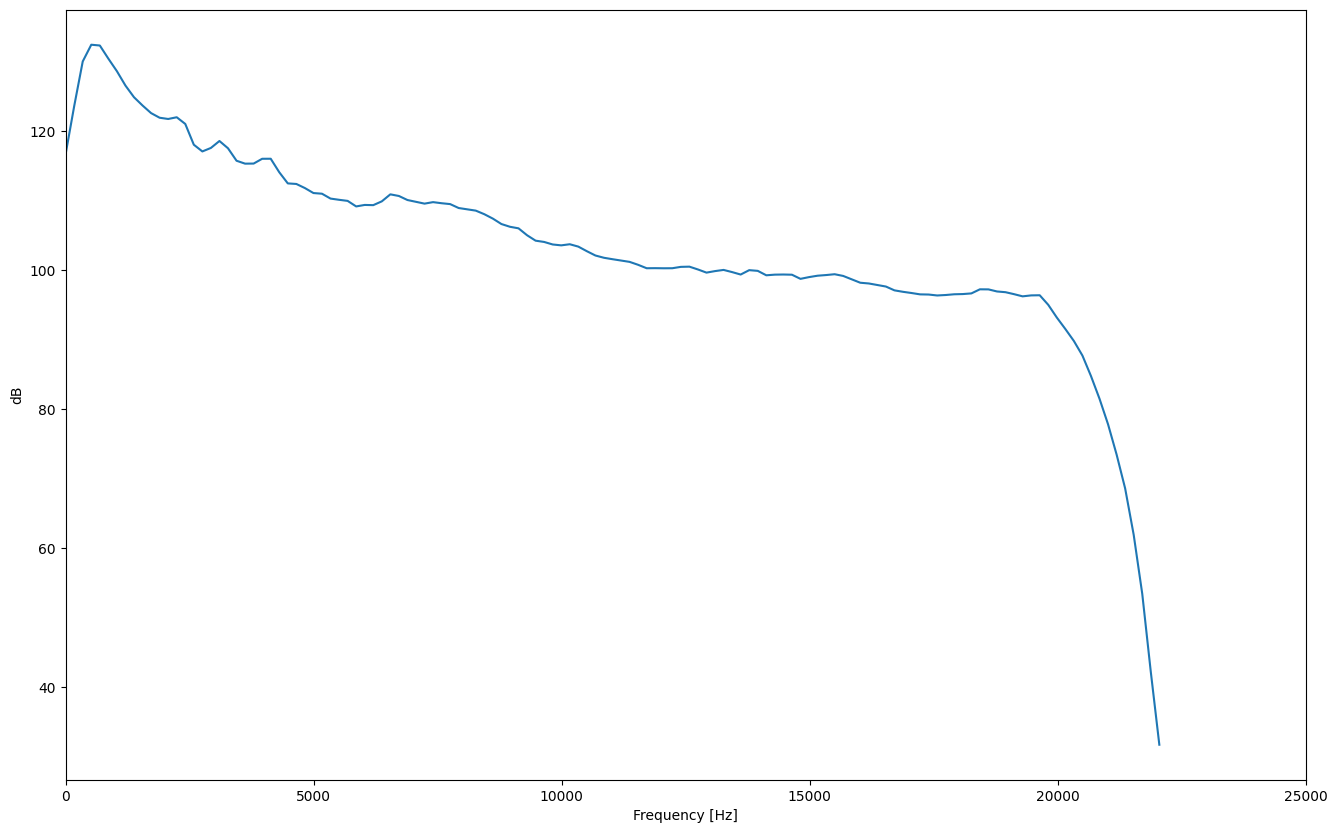

2023_01_22_22_31_00_PaulB.PNG


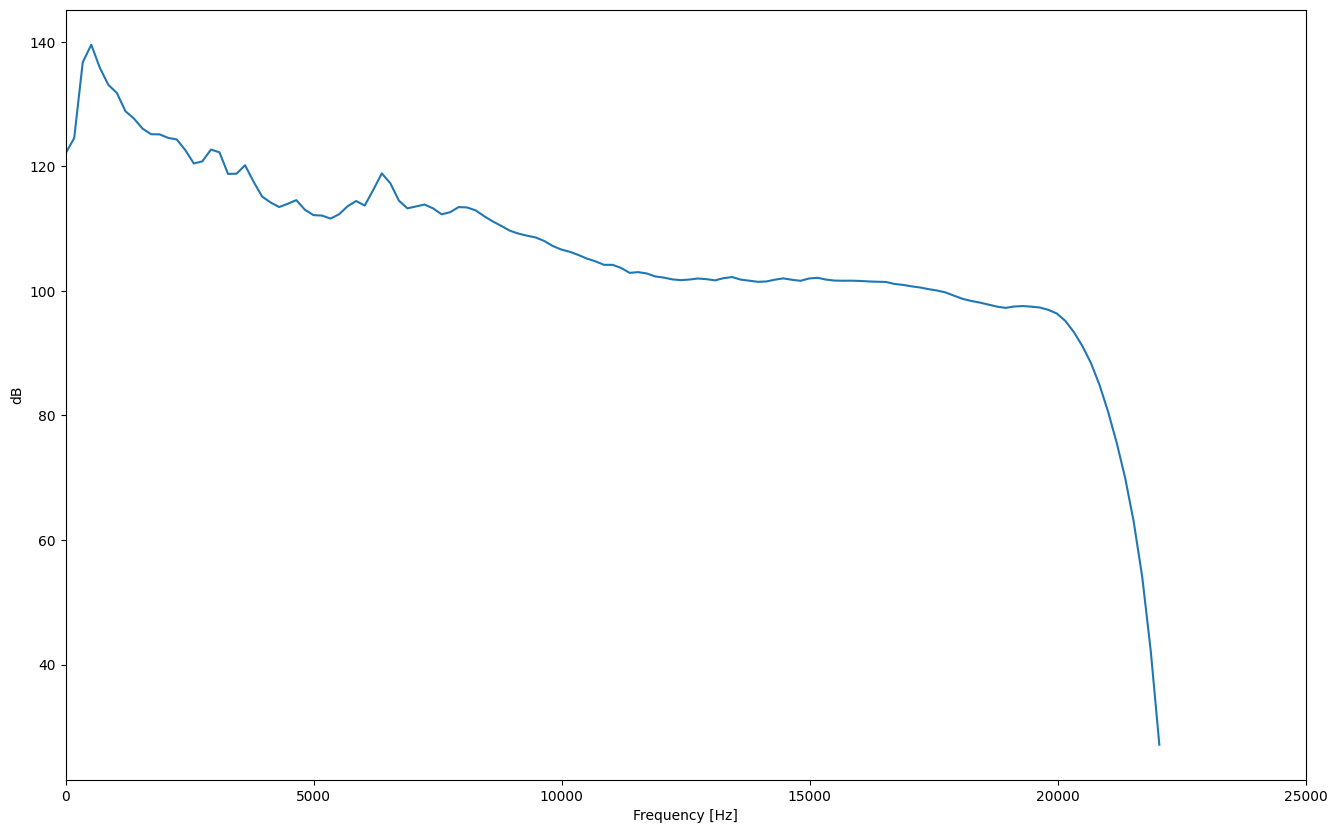

In [33]:

time_skip=0

while(time_skip<5):
    s1=int(time_skip*fs*60)
    s2=int((time_skip+1)*fs*60)
    fig, ax = plt.subplots(figsize=(16,10))
    (f, S)= welch(signal_filt[s1:s2], fs)


    dB = 10*np.log10(S)+199.4
    # print(fs)
    # print(signal_filt)
    # print(S)
    #Power spectral density function (PSD) shows the strength of the variations(energy) as a function of frequency. 
    #In other words, it shows at which frequencies variations are strong and at which frequencies variations are weak.***
    
    plt.plot(f, dB)
    plt.xlim([0, 25000])
    # plt.ylim([0,20000])
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('dB')
    
    # str_time = t[i]+ start.strftime('%Y_%m_%d_%H_%M_%S')
    # print(str_time)
    time_skip = time_skip +1 
    time_stamp = int(t[i].strftime('%M'))+time_skip
    # plt.subplots(figsize=(14,10))
 
    
    
    
    
    temp_name = t[i].strftime('%Y_%m_%d_%H_')+str(time_stamp)+'_'+t[i].strftime('%S')+'_'+phone_name+'.PNG'
    print(temp_name)
    # plt.show()
    # plt.draw()
    plt.savefig('./data/results/'+temp_name,bbox_inches = 'tight',dpi=100)
    plt.show()
    plt.clf()
    plt.close()
    
    